# Get EEG sequence and corresponding image


In [2]:
import torch
from pprint import pprint
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [3]:
root_path = ""
dataset_path = os.path.join(root_path, "dataset")
images_dataset_path = os.path.join(dataset_path, "imageNet_images")
eeg_dataset_path = os.path.join(dataset_path, "eeg")

fig = plt.figure(figsize=(6, 9))
# fig.tight_layout()

<Figure size 600x900 with 0 Axes>

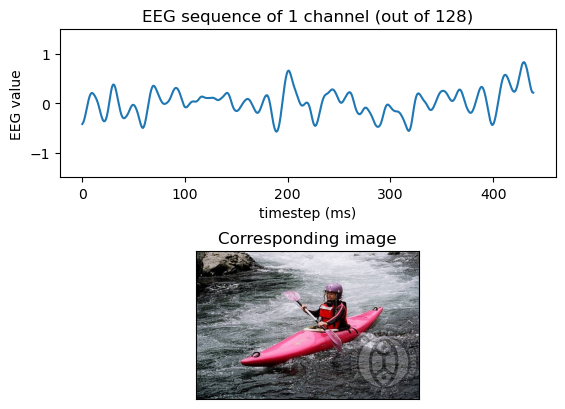

In [4]:
eeg_dataset_name = "eeg_5_95_std.pth"
eeg_dataset = torch.load(os.path.join(eeg_dataset_path, eeg_dataset_name))

# 128 channels x 500 ms segment
data_idx = 0
eeg_segment = eeg_dataset["dataset"][data_idx]["eeg"]

# narrow down to 1 channel and trim
channel_num = 0
eeg_sequence = eeg_segment[channel_num]
trimmed_eeg_sequence = eeg_sequence[40:480]

# plot sequence
plt.subplot(2, 1, 1)
x = np.arange(440)
y = trimmed_eeg_sequence
plt.plot(x, y)
plt.title("EEG sequence of 1 channel (out of 128)")
plt.xlabel("timestep (ms)")
plt.ylabel("EEG value")
plt.ylim(-1.5, 1.5)


# get corresponding image
target_class_index = eeg_dataset["dataset"][data_idx]["label"]
target_image_index = eeg_dataset["dataset"][data_idx]["image"]
target_class_name = eeg_dataset["labels"][target_class_index]
target_image_name = eeg_dataset["images"][target_image_index]

image_path = os.path.join(images_dataset_path, target_class_name, target_image_name)
image_path += ".jpeg"

img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.subplot(2, 1, 2)
plt.title("Corresponding image")
plt.xticks([])
plt.yticks([])
plt.imshow(img)


plt.subplots_adjust(
    left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5
)
plt.show()

In [26]:
print(eeg_dataset.keys())
# print((eeg_dataset['dataset']))
print((eeg_dataset["dataset"][0]))
print((eeg_dataset["dataset"][0].keys()))
print((eeg_dataset["dataset"][0]["eeg"].size()))
print((eeg_dataset["dataset"][0]["image"]))
print(eeg_dataset["images"][(eeg_dataset["dataset"][0]["image"])])
print((eeg_dataset["dataset"][0]["label"]))
print(eeg_dataset["labels"])
print(len(eeg_dataset["labels"]))

dict_keys(['dataset', 'labels', 'images'])
{'eeg': tensor([[-0.0098,  0.0195,  0.0620,  ...,  0.0638,  0.0120, -0.0118],
        [-0.0045,  0.1303,  0.2673,  ...,  0.0894,  0.0342, -0.0082],
        [ 0.0215, -0.2017, -0.4305,  ..., -0.2022, -0.0940,  0.0188],
        ...,
        [ 0.0160,  0.0707,  0.1005,  ...,  0.2066,  0.1156,  0.0036],
        [-0.0046, -0.0084, -0.0119,  ...,  0.0007, -0.0026, -0.0053],
        [ 0.0040,  0.0419,  0.0665,  ...,  0.0765,  0.0309, -0.0063]]), 'image': 0, 'label': 10, 'subject': 4}
dict_keys(['eeg', 'image', 'label', 'subject'])
torch.Size([128, 500])
0
n02951358_31190
10
['n02389026', 'n03888257', 'n03584829', 'n02607072', 'n03297495', 'n03063599', 'n03792782', 'n04086273', 'n02510455', 'n11939491', 'n02951358', 'n02281787', 'n02106662', 'n04120489', 'n03590841', 'n02992529', 'n03445777', 'n03180011', 'n02906734', 'n07873807', 'n03773504', 'n02492035', 'n03982430', 'n03709823', 'n03100240', 'n03376595', 'n03877472', 'n03775071', 'n03272010', 'n040